In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [3]:
train_data = pd.read_csv('DiabeticRetinopathy_train.csv')
validation_data = pd.read_csv('DiabeticRetinopathy_validation.csv')
test_data = pd.read_csv('DiabeticRetinopathy_test.csv')

In [4]:
train_data 

,quality_assessment,Pre-screening,MA_detection_Confidence0.5,MA_detection_Confidence0.6,MA_detection_Confidence0.7,MA_detection_Confidence0.8,MA_detection_Confidence0.9,MA_detection_Confidence1.0,Exudates_Confidence0.3,Exudates_Confidence0.4,Exudates_Confidence0.5,Exudates_Confidence0.6,Exudates_Confidence0.7,Exudates_Confidence0.8,Exudates_Confidence0.9,Exudates_Confidence1.0,Distance_Between_macula_and_optic_disk,Diameter_optic_disc,AM/FM,Class
0,1,1,29,29,28,26,24,18,189.752152,46.437986,22.668862,4.696562,0.730099,0.287336,0.106345,0.068511,0.494069,0.121683,1,1
1,1,1,73,70,61,51,40,24,286.341351,49.691422,27.729469,5.687412,1.987205,0.517598,0.054430,0.007189,0.530448,0.119130,0,1
2,1,1,26,26,26,25,23,19,18.197432,8.463779,0.347027,0.007678,0.000000,0.000000,0.000000,0.000000,0.514848,0.110557,0,0
3,1,0,75,67,56,43,33,24,24.609135,10.657996,3.456785,2.159855,1.668933,1.252208,0.814138,0.294757,0.515086,0.087411,0,1
4,1,1,21,20,19,17,13,6,27.481596,5.579173,1.984350,1.110242,0.653510,0.508516,0.238205,0.053855,0.519491,0.109781,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,1,36,36,35,33,27,19,49.718087,24.471490,12.510102,1.281612,0.079621,0.037412,0.003837,0.003837,0.478831,0.099766,0,0
686,1,1,41,40,40,36,33,24,26.245779,10.302899,2.066102,0.104302,0.007669,0.000000,0.000000,0.000000,0.512211,0.124242,0,0
687,1,1,48,47,46,44,41,28,54.523039,24.530571,10.933078,1.533354,0.064986,0.001547,0.000000,0.000000,0.568326,0.133066,0,0
688,1,1,18,18,18,16,13,12,168.183850,91.057609,33.551339,3.910731,0.065341,0.002926,0.000000,0.000000,0.532806,0.096549,1,0


In [23]:
X_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1].values 
X_valid=validation_data.iloc[:,:-1].values 
y_valid=validation_data.iloc[:,-1].values 
X_test=test_data.iloc[:,:-1].values 
y_test=test_data.iloc[:,-1].values  

In [24]:
X_train

array([[ 1.      ,  1.      , 29.      , ...,  0.494069,  0.121683,
         1.      ],
       [ 1.      ,  1.      , 73.      , ...,  0.530448,  0.11913 ,
         0.      ],
       [ 1.      ,  1.      , 26.      , ...,  0.514848,  0.110557,
         0.      ],
       ...,
       [ 1.      ,  1.      , 48.      , ...,  0.568326,  0.133066,
         0.      ],
       [ 1.      ,  1.      , 18.      , ...,  0.532806,  0.096549,
         1.      ],
       [ 1.      ,  1.      , 33.      , ...,  0.534159,  0.139472,
         0.      ]], shape=(690, 19))

In [25]:
y_train

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [26]:
# Step 3: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_valid, dtype=torch.float32), torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [27]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layers):
        super(NeuralNet, self).__init__()
        layers = []
        prev_size = input_size
        for layer_size in hidden_layers:
            layers.append(nn.Linear(prev_size, layer_size))
            layers.append(nn.Sigmoid())
            prev_size = layer_size
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
    

In [28]:
model = NeuralNet(input_size=19, hidden_layers=[64, 16])
print(model)

NeuralNet(
  (model): Sequential(
    (0): Linear(in_features=19, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [29]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [30]:
from torch.utils.data import DataLoader, TensorDataset

# Create PyTorch dataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoader for batching
batch_size = 32  # Adjust batch size as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [35]:
num_epochs = 20  # Number of training iterations
train_losses = []
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    total_loss = 0  

    for batch in train_loader:  # Iterate over training batches
        inputs, labels = batch  # Get a batch of data
        optimizer.zero_grad()  # 1️⃣ Reset gradients to zero

        outputs = model(inputs)  # 2️⃣ Forward pass: Get predictions
        loss = criterion(outputs, labels)  # 3️⃣ Compute loss

        loss.backward()  # 4️⃣ Backpropagation: Compute gradients
        optimizer.step()  # 5️⃣ Update weights using optimizer

        total_loss += loss.item()  # Store loss for tracking
    avg_loss = total_loss / len(train_loader)  # Compute average loss for this epoch
    train_losses.append(avg_loss)  # Store it for plotting
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 0.2473
Epoch 2, Loss: 0.2470
Epoch 3, Loss: 0.2473
Epoch 4, Loss: 0.2473
Epoch 5, Loss: 0.2472
Epoch 6, Loss: 0.2471
Epoch 7, Loss: 0.2475
Epoch 8, Loss: 0.2473
Epoch 9, Loss: 0.2470
Epoch 10, Loss: 0.2471
Epoch 11, Loss: 0.2472
Epoch 12, Loss: 0.2474
Epoch 13, Loss: 0.2470
Epoch 14, Loss: 0.2471
Epoch 15, Loss: 0.2469
Epoch 16, Loss: 0.2471
Epoch 17, Loss: 0.2472
Epoch 18, Loss: 0.2469
Epoch 19, Loss: 0.2470
Epoch 20, Loss: 0.2471


In [32]:
# Function to evaluate model
def evaluate_model(model, X_data, y_data, dataset_name="Dataset"):
    model.eval()  # Set model to evaluation mode
    
    with torch.no_grad():  # Disable gradients for evaluation
        y_pred_prob = model(X_data)  # Forward pass
        y_pred = (y_pred_prob >= 0.5).float()  # Convert probabilities to 0 or 1
    
    # Convert tensors to NumPy for metrics
    y_true = y_data.cpu().numpy()
    y_pred = y_pred.cpu().numpy()

    # Compute performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n📊 **Evaluation on {dataset_name}:**")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"🎯 Precision: {precision:.4f}")
    print(f"🔄 Recall: {recall:.4f}")
    print(f"🏆 F1-Score: {f1:.4f}")
    print(f"📉 Confusion Matrix:\n{conf_matrix}")

# Evaluate on Validation and Test Data
evaluate_model(model, X_val, y_val, dataset_name="Validation Set")
evaluate_model(model, X_test, y_test, dataset_name="Test Set")



📊 **Evaluation on Validation Set:**
✅ Accuracy: 0.5304
🎯 Precision: 0.5304
🔄 Recall: 1.0000
🏆 F1-Score: 0.6932
📉 Confusion Matrix:
[[  0 108]
 [  0 122]]

📊 **Evaluation on Test Set:**
✅ Accuracy: 0.5325
🎯 Precision: 0.5325
🔄 Recall: 1.0000
🏆 F1-Score: 0.6949
📉 Confusion Matrix:
[[  0 108]
 [  0 123]]


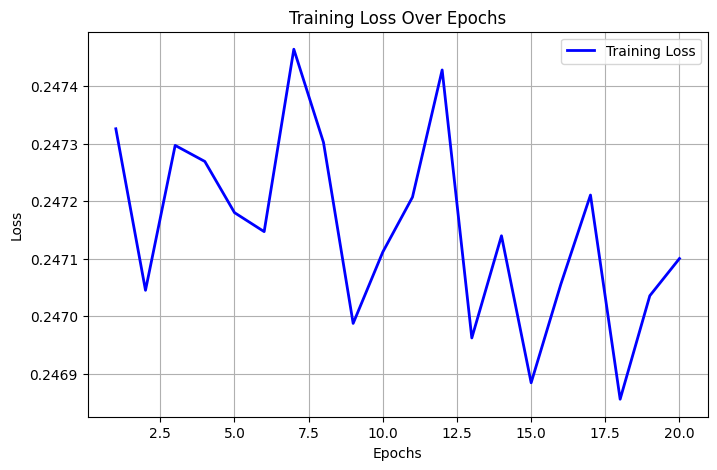

In [36]:
import matplotlib.pyplot as plt

# Plot training loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", color="blue", linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, dataloader, dataset_name="Validation"):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in dataloader:
            outputs = model(inputs)  # Forward pass
            preds = (outputs >= 0.5).float()  # Convert probabilities to binary (0 or 1)
            
            all_preds.extend(preds.numpy().flatten())  # Store predictions
            all_labels.extend(labels.numpy().flatten())  # Store actual labels

    # Convert lists to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Compute performance metrics
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    # Print performance metrics
    print(f"\n📊 {dataset_name} Data Metrics:")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1-score: {f1:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {dataset_name} Data")
    plt.show()



📊 Validation Data Metrics:
✅ Accuracy: 0.5304
✅ Precision: 0.5304
✅ Recall: 1.0000
✅ F1-score: 0.6932


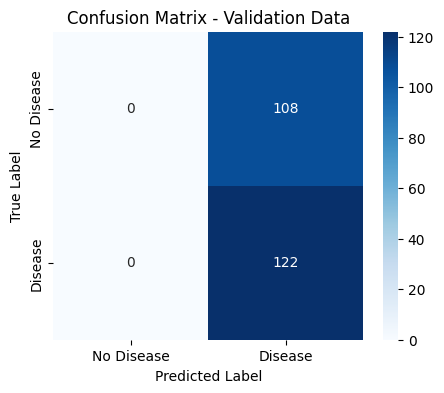


📊 Test Data Metrics:
✅ Accuracy: 0.5325
✅ Precision: 0.5325
✅ Recall: 1.0000
✅ F1-score: 0.6949


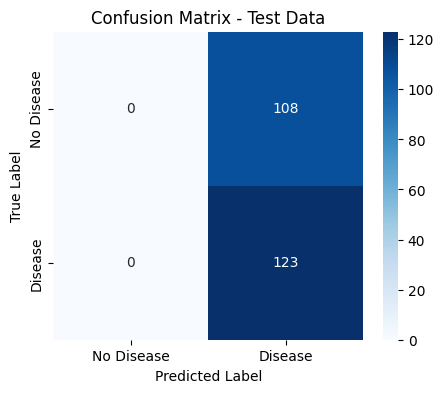

In [39]:
evaluate_model(model, val_loader, dataset_name="Validation")  # Validate model
evaluate_model(model, test_loader, dataset_name="Test")  # Test model
